In [1]:
import time
import pandas as pd
import numpy as np
import string
import dill as pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from functions import real_xml, filter_df

from MLP.AuthorshipModel import AuthorshipModel

In [4]:
import os
os.chdir('C:/Users/ernes/Documents/Authorship')

In [133]:
random_state = 1
nwords = 50
frecuency = 200
subset = None
nfiles = None

In [167]:
df = real_xml('./iniciativas08/', nfiles = nfiles)
print(df.shape)
if subset != None: df = df.sample(10000, random_state = random_state)
print("Leido XML: ", df.shape)
print(time.strftime("%X"))

if nfiles == None: df = filter_df(df, nwords = nwords, frecuency = frecuency)
print("Filtro sobre Dataset: ", df.shape)

le = LabelEncoder()
le.fit(df['name'])

(58338, 2)
Leido XML:  (58338, 2)
23:23:03
antes:  (58338, 3)
despues:  (32060, 3)
despues:  (23701, 4)
Filtro sobre Dataset:  (23701, 4)


LabelEncoder()

<BarContainer object of 100 artists>

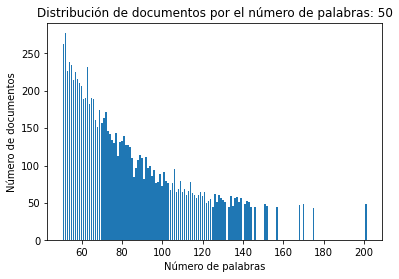

In [108]:
A = df['nwords'].value_counts().head(100)
x = A.index.values
y = A.values
fig, ax = plt.subplots()
plt.xlabel('Número de palabras')
plt.ylabel('Número de documentos')
plt.title('Distribución de documentos por el número de palabras: 50')
ax.bar(x,y)

ROJAS GARCÍA                         197
AGUILAR RIVERO                       192
DELGADO BONILLA                      191
CRUZ VILLALÓN                        189
LOAIZA GARCÍA                        188
                                    ... 
ESCOBAR RUIZ                           2
OJEDA ESCOBAR                          2
BATRES SICILIA PRESIDENTE DE           2
AMARILLO SÁNCHEZ REPRESENTANTE DE      2
OLIVARES CASADO                        2
Name: name, Length: 272, dtype: int64

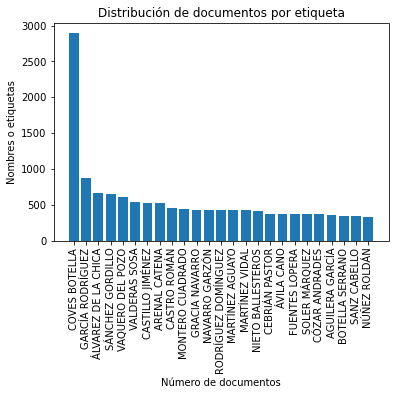

In [128]:
A = df['name'].value_counts().head(25)
x = A.index.values
y = list(A.values)
fig, ax = plt.subplots()
plt.xlabel('Número de documentos')
plt.ylabel('Nombres o etiquetas')

plt.title('Distribución de documentos por etiqueta')
ax.bar(x,y)
plt.xticks(x,x, rotation = 'vertical')
df['name'].value_counts()[df['name'].value_counts() < 200]

In [166]:
print('Numero de documentos: ', df.shape[0])
print('Etiquetas: ', len(le.classes_))

X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['name'],
    test_size = 0.2,
    random_state = random_state
)
print("Train: ", X_train.shape)
print("Test: ", X_test.shape)

Numero de documentos:  23701
Etiquetas:  60
Train:  (18960,)
Test:  (4741,)


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [168]:
from nltk.corpus import stopwords
from string import punctuation
stop_words = stopwords.words("spanish") + list(punctuation)
Vectorizer = CountVectorizer(
    stop_words = stop_words,
    analyzer = 'word',
    encoding = 'utf8',
    dtype = np.float32,
    ngram_range = (1,2),
    max_features = 100000,
    min_df = 1.0 / 1000.0,
    max_df = 999.0 / 1000.0,
    strip_accents = 'unicode',
    decode_error = 'replace',
    lowercase = True
)

In [170]:
Vectorizer.fit(X_train,y_train)
X = Vectorizer.transform(X_train)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teni

In [173]:
from sklearn.feature_selection import f_classif
f_classif(X, y_train)[0][:10]

array([1.3928429, 2.6977215, 1.7414781, 1.3291192, 3.0323727, 3.3997324,
       1.2648721, 1.4696702, 2.5492487, 1.1311922], dtype=float32)

In [42]:
suma = X.sum(axis = 0)
words_freq = [(word, suma[0,idx]) for word, idx in Vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
words_freq[:10]

[('de', 700842.0),
 ('que', 518938.0),
 ('la', 389484.0),
 ('en', 321489.0),
 ('el', 272735.0),
 ('se', 223706.0),
 ('los', 158813.0),
 ('no', 141399.0),
 ('es', 128702.0),
 ('del', 116744.0)]

In [64]:
ws = []
fs = []
for w,f in words_freq[:25]:
    ws.append(w)
    fs.append(f)
fs

[700842.0,
 518938.0,
 389484.0,
 321489.0,
 272735.0,
 223706.0,
 158813.0,
 141399.0,
 128702.0,
 116744.0,
 113053.0,
 111014.0,
 108103.0,
 99363.0,
 92808.0,
 85532.0,
 83517.0,
 63112.0,
 62683.0,
 55195.0,
 52601.0,
 48534.0,
 47167.0,
 45454.0,
 42135.0]

[]

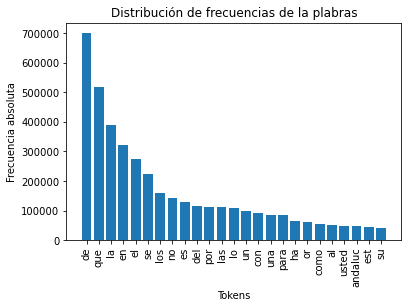

In [66]:
fig, ax = plt.subplots()
hist = ax.bar(ws,fs)
plt.xticks(ws,ws, rotation = 'vertical')
plt.xlabel('Tokens')
plt.ylabel('Frecuencia absoluta')
plt.title('Distribución de frecuencias de la plabras')
ax.plot()

In [165]:
from sklearn.feature_selection import f_classif
f_classif(X), y_train)

SyntaxError: invalid syntax (<ipython-input-165-1063ca0e2a0d>, line 2)